# This Python 3 environment comes with many helpful analytics libraries installed


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [1]:
import numpy as np
import pandas as pd
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
for dirname, _, filenames in os.walk('/kaggle/input'): 
    for filename in filenames: 
        print(os.path.join(dirname, filename))

/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv")
df.sample(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
998,5749,71,0,0,1,36.571735,1,11.236121,2.535219,6.444034,...,0,0,5.472586,0,0,0,0,1,0,XXXConfid
728,5479,68,0,1,0,26.516683,1,7.177056,3.978879,9.273996,...,0,0,1.693400,0,0,0,0,1,0,XXXConfid
1414,6165,71,1,1,1,23.263395,1,11.785543,2.788285,4.271158,...,0,0,7.867315,0,0,0,0,0,0,XXXConfid
1392,6143,65,1,3,1,23.974278,1,17.277586,2.334897,8.221101,...,0,0,6.763787,0,0,0,0,0,0,XXXConfid
451,5202,69,1,0,3,38.573252,1,5.886070,2.273392,7.289339,...,0,0,2.014531,0,0,0,0,1,1,XXXConfid
2119,6870,70,1,0,2,30.664356,0,7.284254,4.152670,9.111937,...,1,0,8.705924,0,0,0,0,1,0,XXXConfid
357,5108,78,0,0,2,21.717502,0,16.541144,9.854843,1.067105,...,0,0,5.294014,1,0,0,0,1,0,XXXConfid
2027,6778,86,0,1,1,27.894214,0,7.986305,5.418355,8.953681,...,0,0,4.001340,0,0,0,0,0,1,XXXConfid
235,4986,90,0,1,0,17.359614,1,3.538268,9.245893,9.240281,...,1,1,9.557954,0,0,0,0,1,1,XXXConfid
1614,6365,82,0,0,1,33.342321,1,12.904710,4.599536,4.688460,...,0,0,3.521934,0,0,0,0,1,0,XXXConfid


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [4]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
num_cols = ["Age", "BMI","AlcoholConsumption", "PhysicalActivity", "DietQuality","ADL"]

In [6]:
df["DoctorInCharge"].nunique()

1

In [7]:
sum(df["Diagnosis"])/len(df["Diagnosis"])

0.35365286179618427

In [8]:
X = df.drop(columns=["Diagnosis","DoctorInCharge"]).copy()
y = df["Diagnosis"].copy()
X.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness'],
      dtype='object')

In [9]:
scaler = StandardScaler()

In [10]:
ct = make_column_transformer(
    (scaler, num_cols),
    remainder = "passthrough"
)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, stratify=y)

In [12]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [13]:
model = xgb.XGBClassifier()

In [14]:
param_grid = {
    'n_estimators': [25,50, 100, 250],  
    'max_depth': [3, 4, 5, 6, 7],          
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5], 
    "gamma" : [0.01, 0.05, 0.1]
           
    
}

In [15]:
GS = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',
    refit=True,
    cv=5
)

In [16]:
GS.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.01, 0.05, 0.1],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [25, 50, 100, 250]},
             scoring='roc_auc')

In [17]:
print(GS.best_params_)
print(GS.best_score_)
best_model = GS.best_estimator_

{'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
0.9897962666429516


In [18]:
pred = best_model.predict(X_test)
preds = pd.Series(pred, index=y_test.index, name="predictions")

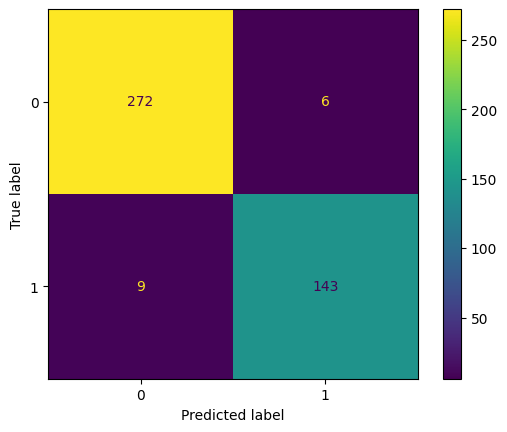

In [19]:
cm = confusion_matrix(y_test, preds, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
disp.plot()

<Axes: xlabel='Correct', ylabel='count'>

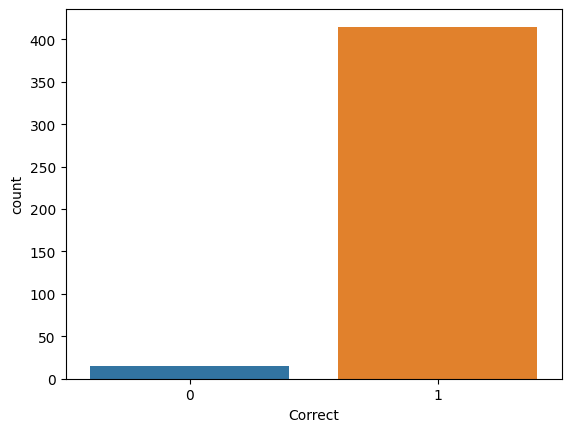

In [20]:
merged_df = pd.concat([y_test, preds], axis=1)

merged_df["Correct"] = (merged_df["Diagnosis"]==merged_df["predictions"]).astype(int)
correct_and_false = pd.DataFrame(merged_df["Correct"].value_counts())
correct_and_false
sns.barplot(correct_and_false, x=correct_and_false.index, y="count")

In [21]:
merged_df["Correct"].value_counts()

Correct
1    415
0     15
Name: count, dtype: int64